# Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing

In [7]:
original_df = pd.read_csv('fifa-18-demo-player-dataset/CompleteDataset.csv', error_bad_lines=False)

/Users/paulfournier/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
processed_df = original_df.copy()
#drop the colums that cannot be used
processed_df = processed_df.drop(['Photo', 'Flag', 'Club Logo', 'Special', 'ID'], 1)
processed_df.head(10)

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,89,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,92,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,94,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,88,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,€355K,79,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6,De Gea,26,Spain,90,92,Manchester United,€64.5M,€215K,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,€295K,93,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,8,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,€340K,60,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,G. Higuaín,29,Argentina,90,90,Juventus,€77M,€275K,78,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [9]:
#Convert the numerical values in string type to integer type. 
def strToInt(string):
    try:
        integer = float(string)
        return integer
    except ValueError:
        return np.nan
    
processed_df['Acceleration'] = processed_df['Acceleration'].apply(strToInt)
processed_df['Aggression'] = processed_df['Aggression'].apply(strToInt)
processed_df['Agility'] = processed_df['Agility'].apply(strToInt)
processed_df['Balance'] = processed_df['Balance'].apply(strToInt)
processed_df['Ball control'] = processed_df['Ball control'].apply(strToInt)
processed_df['Composure'] = processed_df['Composure'].apply(strToInt)
processed_df['Curve'] = processed_df['Curve'].apply(strToInt)
processed_df['Dribbling'] = processed_df['Dribbling'].apply(strToInt)
processed_df['Finishing'] = processed_df['Finishing'].apply(strToInt)
processed_df['Free kick accuracy'] = processed_df['Free kick accuracy'].apply(strToInt)
processed_df['GK diving'] = processed_df['GK diving'].apply(strToInt)
processed_df['GK handling'] = processed_df['GK handling'].apply(strToInt)
processed_df['GK kicking'] = processed_df['GK kicking'].apply(strToInt)
processed_df['GK positioning'] = processed_df['GK positioning'].apply(strToInt)
processed_df['GK reflexes'] = processed_df['GK reflexes'].apply(strToInt)
processed_df['Heading accuracy'] = processed_df['Heading accuracy'].apply(strToInt)
processed_df['Interceptions'] = processed_df['Interceptions'].apply(strToInt)
processed_df['Jumping'] = processed_df['Jumping'].apply(strToInt)
processed_df['Long passing'] = processed_df['Long passing'].apply(strToInt)
processed_df['Long shots'] = processed_df['Long shots'].apply(strToInt)
processed_df['Shot power'] = processed_df['Shot power'].apply(strToInt)
processed_df['Sliding tackle'] = processed_df['Sliding tackle'].apply(strToInt)
processed_df['Sprint speed'] = processed_df['Sprint speed'].apply(strToInt)
processed_df['Stamina'] = processed_df['Stamina'].apply(strToInt)
processed_df['Standing tackle'] = processed_df['Standing tackle'].apply(strToInt)
processed_df['Strength'] = processed_df['Strength'].apply(strToInt)
processed_df['Vision'] = processed_df['Vision'].apply(strToInt)
processed_df['Volleys'] = processed_df['Volleys'].apply(strToInt)
processed_df['CAM'] = processed_df['CAM'].apply(strToInt)
processed_df['CB'] = processed_df['CB'].apply(strToInt)
processed_df['CDM'] = processed_df['CDM'].apply(strToInt)
processed_df['CF'] = processed_df['CF'].apply(strToInt)
processed_df['CM'] = processed_df['CM'].apply(strToInt)
processed_df['LAM'] = processed_df['LAM'].apply(strToInt)
processed_df['LB'] = processed_df['LB'].apply(strToInt)
processed_df['LCM'] = processed_df['LCM'].apply(strToInt)
processed_df['LDM'] = processed_df['LDM'].apply(strToInt)
processed_df['LF'] = processed_df['LF'].apply(strToInt)
processed_df['LM'] = processed_df['LM'].apply(strToInt)
processed_df['LS'] = processed_df['LS'].apply(strToInt)
processed_df['LW'] = processed_df['LW'].apply(strToInt)
processed_df['LWB'] = processed_df['LWB'].apply(strToInt)
processed_df['RAM'] = processed_df['RAM'].apply(strToInt)
processed_df['RB'] = processed_df['RB'].apply(strToInt)
processed_df['RCB'] = processed_df['RCB'].apply(strToInt)
processed_df['RCM'] = processed_df['RCM'].apply(strToInt)
processed_df['RDM'] = processed_df['RDM'].apply(strToInt)
processed_df['RF'] = processed_df['RF'].apply(strToInt)
processed_df['RM'] = processed_df['RM'].apply(strToInt)
processed_df['RS'] = processed_df['RS'].apply(strToInt)
processed_df['RW'] = processed_df['RW'].apply(strToInt)
processed_df['RWB'] = processed_df['RWB'].apply(strToInt)
processed_df['ST'] = processed_df['ST'].apply(strToInt)

# Exploratory Data Analysis

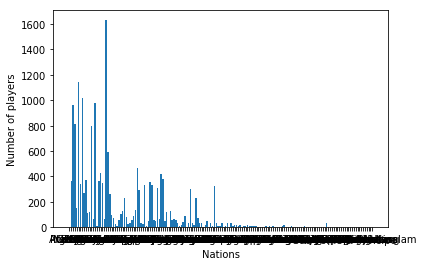

In [11]:
#Show the number of player per country
nations = {'Nation': 0}
def count_nations(nation):
    if (nation in nations):
        nations[nation] = nations[nation]+1
    else:
        nations[nation] = 1

processed_df['Nationality'].apply(count_nations)

plt.bar(range(len(nations)), list(nations.values()), align='center',)
plt.xticks(range(len(nations)), list(nations.keys()))
plt.xlabel('Nations')
plt.ylabel('Number of players')
plt.show()
